<a href="https://colab.research.google.com/github/amansingh88688/handwritten-digit-recognition/blob/main/HandWritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [15]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

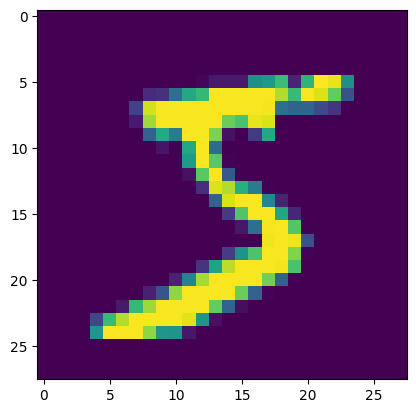

In [33]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

## Make all values ranging from 0-255 into 0-1

In [41]:
# divide by 255
X_train = X_train/255
X_test = X_test/255

In [42]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [94]:
model = Sequential()

# converting 3d array to 1d array using flatten
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128, activation='relu'))

# we have more than 1 node in output so we will be using softmax
model.add(Dense(10, activation='softmax'))

In [95]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

## Training the model

In [97]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.2935 - accuracy: 0.6954 - val_loss: 0.6545 - val_accuracy: 0.8485
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5434 - accuracy: 0.8624 - val_loss: 0.4288 - val_accuracy: 0.8889
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4149 - accuracy: 0.8885 - val_loss: 0.3590 - val_accuracy: 0.9021
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3651 - accuracy: 0.8983 - val_loss: 0.3267 - val_accuracy: 0.9084
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3387 - accuracy: 0.9042 - val_loss: 0.3088 - val_accuracy: 0.9126
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3209 - accuracy: 0.9090 - val_loss: 0.2949 - val_accuracy: 0.9160
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3080 - accuracy: 0.9124 - val_loss: 0.2861 - val_accuracy:

In [98]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 924us/step


In [99]:
y_pred = y_prob.argmax(axis=1)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8751

Showing 87% accuracy

In [74]:
# we can increase our prediction score by increasing-----
# More layers
# Increase no. of nodes in existing layer
# By increasing the epochs value

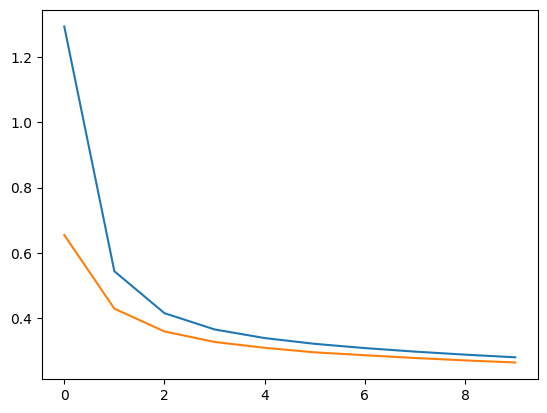

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

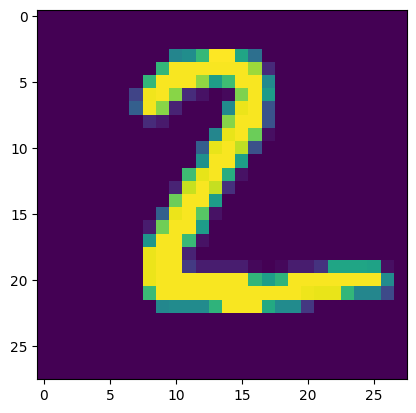

In [108]:
plt.imshow(X_test[1])

In [112]:
ans = model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)
print("The above number is: ",ans)

1/1 [==============================] - 0s 22ms/step
The above number is:  [2]
